In [9]:
%matplotlib inline
import pandas as pd
import matplotlib.pylab as plt
import numpy as np
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from matplotlib.legend import Legend

In [10]:
#Load the clean data sample from phase 1
df = pd.read_csv('https://raw.githubusercontent.com/INFO590-Pythoneers/Final-Project-Repo/master/Phase%202/Data/BreastCancerWisconsinUpdate.csv')
print(df.head())

       Scn  A2  A3  A4  A5  A6    A7  A8  A9  A10  CLASS
0  1000025   5   1   1   1   2   1.0   3   1    1      2
1  1002945   5   4   4   5   7  10.0   3   2    1      2
2  1015425   3   1   1   1   2   2.0   3   1    1      2
3  1016277   6   8   8   1   3   4.0   3   7    1      2
4  1017023   4   1   1   3   2   1.0   3   1    1      2


### Use KMeans algorithm

In [11]:
#Slice the dataframe to include only columns A2 through A10.
dfslice = df[['A2', 'A3', 'A4', 'A5', 'A6', 'A7', 'A8', 'A9', 'A10']]

#Use KMeans clustering with n = 4 clusters.
model = KMeans(n_clusters=4)
model.fit(dfslice)

#Find the centroid locations per cluster.
centroids=model.cluster_centers_.round(4)
print('\t\tCentroids for Each Feature (using 4 clusters) \n')
pd.set_option('display.expand_frame_repr', False)
print(pd.DataFrame(centroids,columns=dfslice.axes[1]))

		Centroids for Each Feature (using 4 clusters) 

       A2      A3      A4      A5      A6      A7      A8      A9     A10
0  2.9449  1.2445  1.3656  1.2930  2.0396  1.3514  2.0617  1.2004  1.0771
1  7.2340  4.8511  5.0426  4.8617  4.1170  9.3830  5.2660  3.7872  1.6489
2  7.4648  7.0282  6.6761  4.1972  5.5352  3.4532  5.3803  6.8169  2.3099
3  6.7625  8.3875  8.4250  7.7500  6.7750  9.2125  7.3750  7.7375  3.7875


### Find the optimal number of clusters

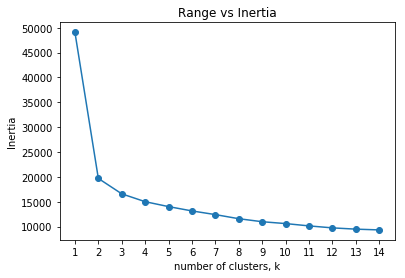

In [12]:
# make a range from 1 to 15
ks = range(1, 15)

# create an empty list
inertias = []

# for loop to calculate KMeans for each values 
for k in ks:
    model =KMeans(n_clusters=k) 
    model.fit(dfslice)    
    # Append the inertia to the list of inertias
    inertias.append(model.inertia_)
    
# Plot Range vs Inertias
plt.plot(ks, inertias, '-o')
plt.xlabel('number of clusters, k')
plt.ylabel('Inertia')
plt.title('Range vs Inertia')
plt.xticks(ks)
plt.show()

The optimal number of clusters is determined when inertia begins to decrease at a slower pace, also known as the "elbow" in the inertia plot. In our data sample above the optimal number of clusters is two.  

In [13]:
#Use KMeans clustering with n = 2 clusters.
model = KMeans(n_clusters=2)
model.fit(dfslice)

#Find the centroid locations per cluster.
centroids=model.cluster_centers_.round(4)
print('  Centroids for Each Feature without Standardized Scaling (2 clusters) \n')
pd.set_option('display.expand_frame_repr', False)
print(pd.DataFrame(centroids,columns=dfslice.axes[1]))

  Centroids for Each Feature without Standardized Scaling (2 clusters) 

       A2      A3      A4      A5      A6     A7      A8      A9     A10
0  7.1588  6.7983  6.7296  5.7339  5.4721  7.874  6.1030  6.0773  2.5494
1  3.0472  1.3026  1.4464  1.3433  2.0880  1.380  2.1052  1.2618  1.1094


### Revise the data variation

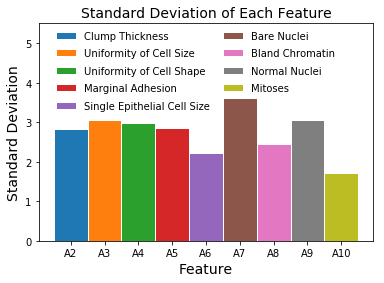

In [14]:
#Create a label dictionary
labelDictionary = {
    "A2": "Clump Thickness",
    "A3": "Uniformity of Cell Size",
    "A4": "Uniformity of Cell Shape",
    "A5": "Marginal Adhesion",
    "A6": "Single Epithelial Cell Size",
    "A7": "Bare Nuclei",
    "A8": "Bland Chromatin",
    "A9": "Normal Nuclei",
    "A10": "Mitoses",
}
# Calculate the standard deviation for A2 to A10
x = 0
limit = 5.5
fig, ax = plt.subplots()
for index in df.iloc[:,1:10]:
    series = df[index]
    std = series.std()
    bar =plt.bar([x], [std], width=1, edgecolor='white')
    xpos = 0.04 if x < 5 else 0.54
    ypos = 0.9 - x * 0.08 if x < 5 else 0.9 - (x-5) * 0.08
    leg = Legend(ax, [bar], [labelDictionary[index]], frameon = False, loc=[xpos, ypos])
    ax.add_artist(leg);
    x=x+1

#Plot bar graph with legends and ticks   
plt.ylabel("Standard Deviation", fontsize=14)
plt.xlabel("Feature", fontsize=14)
plt.ylim(0, limit)
plt.title("Standard Deviation of Each Feature", fontsize=14)
plt.xticks(np.arange(9), labelDictionary.keys())

plt.show()

"Clump Thickness", "Uniformity of Cell Size", Uniformity of Cell Shape", "Marginal Adhesion", "Bare Nuclei" and "Normal Nuclei" all have relatively higher standard deviation compared to "Single Epithelial Cell Size", "Bland Chromatin" and "Mitosis". This higher variation will result in a greater weight for those features and will result in those features overly influencing the results in a cluster analysis. In the kmeans algorithm, feature variance is equal to feature influence. We need to standardize the features so that all features can be given an equal weight during cluster analysis. In the next step we will normalize the data by using a standard scaler to tranform each feature to have a mean of 0 and a variance of 1 to give them equal weighting.

### Implement Normalization

In [15]:
#Normalize data using the standard scaler to give mean of 0 and variance of 1
scaler = StandardScaler()
kmeans = KMeans(n_clusters = 2)
pipeline = make_pipeline(scaler, kmeans)
pipeline.fit(dfslice)

#Format the output the centroids
centroids=kmeans.cluster_centers_.round(4)
print('   Centroids for Each Feature with Standardized Scaling (2 clusters) \n')
pd.set_option('display.expand_frame_repr', False)
print(pd.DataFrame(centroids,columns=dfslice.axes[1]))

   Centroids for Each Feature with Standardized Scaling (2 clusters) 

       A2      A3      A4      A5      A6      A7      A8      A9     A10
0  0.9828  1.2007  1.1911  1.0192  1.0139  1.1565  1.0830  1.0477  0.5996
1 -0.4977 -0.6081 -0.6032 -0.5162 -0.5135 -0.5857 -0.5485 -0.5306 -0.3037
